In [77]:
import pandas as pd
import numpy as np
import numpy.ma as ma
import xarray as xr
import os
import datetime
from datetime import datetime
from scipy import interpolate
from scipy.interpolate import griddata
import netCDF4 as nc4
from netCDF4 import Dataset
import xesmf as xe
import matplotlib.dates as mdates
import cmaps
import regionmask
import gcpy.plot as gcplot

from scipy import stats
import matplotlib.pyplot as plt
from pylib.smafit import smafit
import statsmodels.formula.api as smf

land = regionmask.defined_regions.natural_earth.land_110

def file_list(dirname, ext='.csv'):
    import os
    return list(filter(
        lambda filename: os.path.splitext(filename)[1] == ext,
        os.listdir(dirname)))

import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm
xlabelfont = {'family' : 'DejaVu Sans',
              'weight' : 'normal',
              'size'   : 16 ,
             }
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['figure.figsize'] = (10, 6)
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

import rum

In [78]:
hour1 = 12+8
hour2 = 15+8

def selnoon(x,hour1,hour2,year):
    x_noon = x.where( (x.time.dt.hour>=hour1) &\
            (x.time.dt.hour<=hour2) &\
            (x.time.dt.year==year) &\
            (x.time.dt.month>=5) &\
            (x.time.dt.month<=8) )
    return x_noon



        
def mjja(var,tmp_title,vminmax,unitname,cmapname):

    ############################    show   GC   restults    ################################
    import numpy as np
    import Ngl,Nio
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib as mpl

    import cartopy.feature as cfeature
    import cartopy.crs as ccrs
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    import matplotlib.cm as cm

    xlabelfont = {
    'weight' : 'normal',
    'size'   : 22,
    }
    monname = ["May","June","July","August"]
    figsize=(32,8)

    
    for ivar in range(0,len(var)):


        # monthly mean variable
        mm_HCHOVCD = var[ivar].resample(time="1MS").mean(dim="time")   # 5678


        nrow = 1
        ncol = 4


        ipanel = 0
        ipanelindex = np.arange(1,1+nrow*ncol,1)

        fig = plt.figure(figsize=figsize)
        for imon in range(5,9): 

            vmin=vminmax[ivar][0]
            vmax=vminmax[ivar][1]
            cmap = cmapname[ivar]
            norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

            #####################################################################################
            ###################  GEOSCHEM HCHO VCD regridded noon (time mean)
            #####################################################################################

            ax = fig.add_subplot(nrow,ncol,ipanelindex[ipanel], projection=ccrs.PlateCarree(), aspect='auto')

            # Select some data to plot
            im = ax.pcolormesh(lon_gc_AK, lat_gc_AK, mm_HCHOVCD[imon-5,:,:] ,cmap=cmap,norm=norm)

            # add colorbar
            mappable = cm.ScalarMappable(cmap=cmap)
            mappable.set_array([])
            mappable.set_clim(vmin=vmin, vmax=vmax)
#             if ipanelindex[ipanel]==3:
#                 cb = plt.colorbar(mappable)
#                 cb.set_label('moles/cm^2',fontdict=xlabelfont)

            # add lat lon label
            ax.set_xticks([-160,-150,-140,-130], crs=ccrs.PlateCarree())
            if ipanelindex[ipanel]==1:
                ax.set_yticks([50,55,60,65,70,75], crs=ccrs.PlateCarree())
            lon_formatter = LongitudeFormatter(zero_direction_label=True)
            lat_formatter = LatitudeFormatter()
            ax.xaxis.set_major_formatter(lon_formatter)
            ax.yaxis.set_major_formatter(lat_formatter)
            plt.title(monname[imon-5]+" "+tmp_title[ivar])    
            ax.add_feature(cfeature.COASTLINE)
            ax.add_feature(cfeature.BORDERS)
            ipanel+=1



        import matplotlib.ticker                         # here's where the formatter is
        cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
        cbformat.set_powerlimits((-2,2))                 # set the limits for sci. not.
        position=fig.add_axes([0.91, 0.65, 0.005, 0.23])
        cb = fig.colorbar(im,cax=position,orientation='vertical',format=cbformat)
        cb.set_label(unitname[ivar])


        fig.tight_layout()#调整整体空白 
        plt.subplots_adjust(wspace =0.01, hspace =0.1)#调整子图间距
        # plt.savefig(outdir+'GCAvk_vs_TPM_AK_18',dpi=300)
        

###############################################################


def mjja_err(var,tmp_title,vminmax,unitname,cmapname):

    ############################    show   GC   restults    ################################
    import numpy as np
    import Ngl,Nio
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib as mpl

    import cartopy.feature as cfeature
    import cartopy.crs as ccrs
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    import matplotlib.cm as cm

    xlabelfont = {
    'weight' : 'normal',
    'size'   : 22,
    }
    monname = ["May","June","July","August"]
    figsize=(32,8)

    
    for ivar in range(0,len(var)):

        # count value numbers
        count_HCHOVCD = HCHOVCD_Trueness_TPM_18.resample(time="1MS").count(dim="time")
        # monthly mean variable
        mm_HCHOVCD = var[ivar].resample(time="1MS").mean(dim="time")   # 5678
        
        # Monthly Error
        mErr_HCHOVCD = mm_HCHOVCD/np.sqrt(count_HCHOVCD)   # 5678


        nrow = 1
        ncol = 4


        ipanel = 0
        ipanelindex = np.arange(1,1+nrow*ncol,1)

        fig = plt.figure(figsize=figsize)
        for imon in range(5,9): 

            vmin=vminmax[ivar][0]
            vmax=vminmax[ivar][1]
            cmap = cmapname[ivar]
            norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

            #####################################################################################
            ###################  GEOSCHEM HCHO VCD regridded noon (time mean)
            #####################################################################################

            ax = fig.add_subplot(nrow,ncol,ipanelindex[ipanel], projection=ccrs.PlateCarree(), aspect='auto')

            # Select some data to plot
            im = ax.pcolormesh(lon_gc_AK, lat_gc_AK, mErr_HCHOVCD[imon-5,:,:] ,cmap=cmap,norm=norm)

            # add colorbar
            mappable = cm.ScalarMappable(cmap=cmap)
            mappable.set_array([])
            mappable.set_clim(vmin=vmin, vmax=vmax)
#             if ipanelindex[ipanel]==3:
#                 cb = plt.colorbar(mappable)
#                 cb.set_label('moles/cm^2',fontdict=xlabelfont)

            # add lat lon label
            ax.set_xticks([-160,-150,-140,-130], crs=ccrs.PlateCarree())
            if ipanelindex[ipanel]==1:
                ax.set_yticks([50,55,60,65,70,75], crs=ccrs.PlateCarree())
            lon_formatter = LongitudeFormatter(zero_direction_label=True)
            lat_formatter = LatitudeFormatter()
            ax.xaxis.set_major_formatter(lon_formatter)
            ax.yaxis.set_major_formatter(lat_formatter)
            plt.title(monname[imon-5]+" "+tmp_title[ivar])    
            ax.add_feature(cfeature.COASTLINE)
            ax.add_feature(cfeature.BORDERS)
            ipanel+=1



        import matplotlib.ticker                         # here's where the formatter is
        cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
        cbformat.set_powerlimits((-2,2))                 # set the limits for sci. not.
        position=fig.add_axes([0.91, 0.65, 0.005, 0.23])
        cb = fig.colorbar(im,cax=position,orientation='vertical',format=cbformat)
        cb.set_label(unitname[ivar])


        fig.tight_layout()#调整整体空白 
        plt.subplots_adjust(wspace =0.01, hspace =0.1)#调整子图间距
        # plt.savefig(outdir+'GCAvk_vs_TPM_AK_18',dpi=300)
        

    

        
def calbox(clat,clon,km):
    import math

#     clat = 64.8
#     clon = -147.7A
#     km = 30

    cos_clat = math.cos(clat*math.pi/180)
    dlon = km/(111*cos_clat)
    dlat = km/111

    latN = clat + dlat/2
    latS = clat - dlat/2
    latrange = [latS, latN]

    lonE = clon + dlon/2
    lonW = clon - dlon/2
    lonrange = [lonW, lonE]
    
    return latrange, lonrange




        
from rasterio import features
from affine import Affine
import geopandas as gpd

shpfile = '../gadm36_USA/gadm36_USA_1.shp'
shp_df = gpd.read_file(shpfile)
shp_AK = shp_df[shp_df["NAME_1"]=="Alaska"]


def transform_from_latlon(lat, lon):
    """ input 1D array of lat / lon and output an Affine transformation
    """
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

def rasterize(shapes, coords, latitude='latitude', longitude='longitude',
              fill=np.nan, **kwargs):
    """Rasterize a list of (geometry, fill_value) tuples onto the given
    xray coordinates. This only works for 1d latitude and longitude
    arrays.

    usage:
    -----
    1. read shapefile to geopandas.GeoDataFrame
          `states = gpd.read_file(shp_dir+shp_file)`
    2. encode the different shapefiles that capture those lat-lons as different
        numbers i.e. 0.0, 1.0 ... and otherwise np.nan
          `shapes = (zip(states.geometry, range(len(states))))`
    3. Assign this to a new coord in your original xarray.DataArray
          `ds['states'] = rasterize(shapes, ds.coords, longitude='X', latitude='Y')`

    arguments:
    ---------
    : **kwargs (dict): passed to `rasterio.rasterize` function

    attrs:
    -----
    :transform (affine.Affine): how to translate from latlon to ...?
    :raster (numpy.ndarray): use rasterio.features.rasterize fill the values
      outside the .shp file with np.nan
    :spatial_coords (dict): dictionary of {"X":xr.DataArray, "Y":xr.DataArray()}
      with "X", "Y" as keys, and xr.DataArray as values

    returns:
    -------
    :(xr.DataArray): DataArray with `values` of nan for points outside shapefile
      and coords `Y` = latitude, 'X' = longitude.


    """
    transform = transform_from_latlon(coords[latitude], coords[longitude])
    out_shape = (len(coords[latitude]), len(coords[longitude]))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    spatial_coords = {latitude: coords[latitude], longitude: coords[longitude]}
    return xr.DataArray(raster, coords=spatial_coords, dims=(latitude, longitude))

def xr_shpmask(xr_da, shp_gpd):
    import geopandas as gpd
    """ Create a new coord for the xr_da indicating whether or not it 
         is inside the shapefile

        Creates a new coord - "coord_name" which will have integer values
         used to subset xr_da for plotting / analysis/

        Usage:
        -----
        precip_da = xr_shpmask(precip_da, shp_gpd)
    """
#     # 1. read in shapefile
#     shp_gpd = gpd.read_file(shp_path)

    # 2. create a list of tuples (shapely.geometry, id)
    #    this allows for many different polygons within a .shp file (e.g. States of US)
    shapes = [(shape, n) for n, shape in enumerate(shp_gpd.geometry)]

    # 3. create a new coord in the xr_da which will be set to the id in `shapes`
    xr_da["awash"] = rasterize(shapes, xr_da.coords, 
                               longitude='lon', latitude='lat')
    xr_da_masked = xr_da.where(xr_da.awash==0, other=np.nan)
    
    return xr_da_masked

In [79]:
jndirSIF="/import/GREENING/tzhao/jndata/TROPOMI_SIF/"
jndir = "/import/GREENING/tzhao/jndata/TROPOMI_HCHO/"
# jndirCO = "/import/GREENING/tzhao/jndata/TROPOMI_CO/"
# jndirPdr = "/import/GREENING/tzhao/jndata/Pandora/"
jndirGC = "/import/GREENING/tzhao/jndata/GEOS-Chem/"
jndirGC_NoWF = jndirGC+"MEGANon_PFTol_NoWF/"
jndirGC_WF = jndirGC+"MEGANon_PFTol_WF/"
# jndirGC_Moff = jndirGC+"ISOPon_MTPoff_NoWF_PFTOnline/"
jndirGC_BVOCe_off_WF = jndirGC+"BVOCoff_PFTol_WF/"
jndirGC_BVOCe_off_NoWF = jndirGC+"BVOCoff_PFTol_NoWF/"
jndirGC_BVOCe_off_WEFHCHOoff = jndirGC+"BVOCoff_PFTol_WEFHCHOoff/"

# jndirGCMTPx10_NoWF = jndirGC+"MTPx10_NoWF/"
# jndirMERRA2 = "/import/GREENING/tzhao/jndata/MERRA2/"

workdir = "/home/tzhao/my_jupyter_work/newest/"

# lat, lon 0.5x0.625
###############################################################################
lat_gc_AK = np.load(jndir+'lat_gc_AK_050625.npy')
lon_gc_AK = np.load(jndir+'lon_gc_AK_050625.npy')

TPM_hsigma = xr.open_dataset(jndir+"TROPOMI_hsigma.nc", engine="netcdf4")
b_tpm = TPM_hsigma["b_tpm"]
ap_tpm = TPM_hsigma["ap_tpm"]
H_b_gc = xr.open_dataarray(jndirGC+"H_b_gc.nc", engine="netcdf4")

In [80]:
# new colormap

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap = cmaps.GHRSST_anomaly
newcolors=cmap(np.linspace(0, 1, 256))
GHRSST_pos = ListedColormap(newcolors[128:])

In [81]:
#############  TROPOMI GCHiR   ##################

TPM_18 = xr.open_dataset(jndir+"TROPOMI_HCHO_GCHiR_hr_18_Fullrange.nc", engine="netcdf4")
HCHOVCD_TPM_18 = TPM_18["HCHOVCD_TPM_GCHiR"]
HCHOVCD_err_TPM_18 = TPM_18["HCHOVCD_err_TPM_GCHiR"]
AMF_HCHO_trop_TPM_18 = TPM_18["AMF_HCHO_trop_TPM_GCHiR"]
HCHOSCD_corr_TPM_18 = TPM_18["HCHOSCD_corr_TPM_GCHiR"]
HCHOVCD0_TPM_18 = TPM_18["HCHOVCD0_TPM_GCHiR"]

TPM_19 = xr.open_dataset(jndir+"TROPOMI_HCHO_GCHiR_hr_19_Fullrange__AddHiR.nc", engine="netcdf4")
HCHOVCD_TPM_19 = TPM_19["HCHOVCD_TPM_GCHiR"]
HCHOVCD_err_TPM_19 = TPM_19["HCHOVCD_err_TPM_GCHiR"]
AMF_HCHO_trop_TPM_19 = TPM_19["AMF_HCHO_trop_TPM_GCHiR"]
HCHOSCD_corr_TPM_19 = TPM_19["HCHOSCD_corr_TPM_GCHiR"]
HCHOVCD0_TPM_19 = TPM_19["HCHOVCD0_TPM_GCHiR"]


# Averaging Kernel of TROPOMI
TPM_AvK_18 = xr.open_dataset(jndir+"TROPOMI_AvKapri_GCHiR_hr_18_Fullrange.nc", engine="netcdf4")
HCHOAvK_TPM_18 = TPM_AvK_18["AveragingKernel_TPM_GCHiR"]

TPM_AvK_19 = xr.open_dataset(jndir+"TROPOMI_AvKapri_GCHiR_hr_19_Fullrange.nc", engine="netcdf4")
HCHOAvK_TPM_19 = TPM_AvK_19["AveragingKernel_TPM_GCHiR"].loc[HCHOVCD_TPM_19.time[0]:HCHOVCD_TPM_19.time[-1]]


# read GC AMF
AMF_GC_18_NoWF = xr.open_dataarray(jndirGC_NoWF+"AMF_GC_18.revised.2.nc", engine="netcdf4")
AMF_GC_18_WF = xr.open_dataarray(jndirGC_WF+"AMF_GC_18.revised.2.nc", engine="netcdf4")

AMF_GC_19_NoWF = xr.open_dataarray(jndirGC_NoWF+"AMF_GC_19.revised.2.nc", engine="netcdf4")
AMF_GC_19_WF = xr.open_dataarray(jndirGC_WF+"AMF_GC_19.revised.2.nc", engine="netcdf4")






In [83]:
# Load data
#######################     GEOS-Chem      #######################

# get TROPOMI time
time_TPM_18 = HCHOVCD_TPM_18.time

#-----------------------------------------------------------------
#--                      MEGANon_PFTol_WF                       --
#-----------------------------------------------------------------

# Species    ( Wildfire )
SpeciesConc_CH2O_18_WF = xr.open_dataarray(jndirGC_WF+"SpeciesConc_CH2O_18.nc", engine="netcdf4").loc[HCHOVCD_TPM_18.time[0]:HCHOVCD_TPM_18.time[-1]]
SpeciesConc_ISOP_18_WF = xr.open_dataarray(jndirGC_WF+"SpeciesConc_ISOP_18.nc", engine="netcdf4").loc[HCHOVCD_TPM_18.time[0]:HCHOVCD_TPM_18.time[-1]]

SpeciesConc_CH2O_19_WF = xr.open_dataarray(jndirGC_WF+"SpeciesConc_CH2O_19.nc", engine="netcdf4").loc[HCHOVCD_TPM_19.time[0]:HCHOVCD_TPM_19.time[-1]]
SpeciesConc_ISOP_19_WF = xr.open_dataarray(jndirGC_WF+"SpeciesConc_ISOP_19.nc", engine="netcdf4").loc[HCHOVCD_TPM_19.time[0]:HCHOVCD_TPM_19.time[-1]]



# Met
Met_BXHEIGHT_18 = xr.open_dataarray(jndirGC_WF+"Met_BXHEIGHT_18.nc", engine="netcdf4").loc[HCHOVCD_TPM_18.time[0]:HCHOVCD_TPM_18.time[-1]]
Met_AIRDEN_18 = xr.open_dataarray(jndirGC_WF+"Met_AIRDEN_18.nc", engine="netcdf4").loc[HCHOVCD_TPM_18.time[0]:HCHOVCD_TPM_18.time[-1]]
Met_PBLH_18 = xr.open_dataarray(jndirGC_WF+"Met_PBLH_18.nc", engine="netcdf4").loc[HCHOVCD_TPM_18.time[0]:HCHOVCD_TPM_18.time[-1]]
Met_SLP_18 = xr.open_dataarray(jndirGC_WF+"Met_SLP_18.nc", engine="netcdf4").loc[HCHOVCD_TPM_18.time[0]:HCHOVCD_TPM_18.time[-1]]
Met_T_18 = xr.open_dataarray(jndirGC_WF+"Met_T_18.nc", engine="netcdf4").loc[HCHOVCD_TPM_18.time[0]:HCHOVCD_TPM_18.time[-1]]

Met_BXHEIGHT_19 = xr.open_dataarray(jndirGC_WF+"Met_BXHEIGHT_19.nc", engine="netcdf4").loc[HCHOVCD_TPM_19.time[0]:HCHOVCD_TPM_19.time[-1]]
Met_AIRDEN_19 = xr.open_dataarray(jndirGC_WF+"Met_AIRDEN_19.nc", engine="netcdf4").loc[HCHOVCD_TPM_19.time[0]:HCHOVCD_TPM_19.time[-1]]
Met_PBLH_19 = xr.open_dataarray(jndirGC_WF+"Met_PBLH_19.nc", engine="netcdf4").loc[HCHOVCD_TPM_19.time[0]:HCHOVCD_TPM_19.time[-1]]
Met_SLP_19 = xr.open_dataarray(jndirGC_WF+"Met_SLP_19.nc", engine="netcdf4").loc[HCHOVCD_TPM_19.time[0]:HCHOVCD_TPM_19.time[-1]]
Met_T_19 = xr.open_dataarray(jndirGC_WF+"Met_T_19.nc", engine="netcdf4").loc[HCHOVCD_TPM_19.time[0]:HCHOVCD_TPM_19.time[-1]]

ap_gc = xr.open_dataarray(jndirGC+"ap_gc.nc", engine="netcdf4")
b_gc = xr.open_dataarray(jndirGC+"b_gc.nc", engine="netcdf4")


# # GEOS-CHem VCD    ( Wildfire )
# tmp_vcd = (SpeciesConc_CH2O_18_WF * Met_AIRDEN_18 * Met_BXHEIGHT_18 ).sum(dim='lev')
# HCHOVCD_GC_18_WF = tmp_vcd*6.02e23*1e3/29/1e4
# tmp_vcd = (SpeciesConc_CH2O_19_WF * Met_AIRDEN_19 * Met_BXHEIGHT_19 ).sum(dim='lev')
# HCHOVCD_GC_19_WF = tmp_vcd*6.02e23*1e3/29/1e4


#-----------------------------------------------------------------
#--                      MEGANon_PFTol_NoWF                     --
#-----------------------------------------------------------------

# Species    ( No Wildfire )
SpeciesConc_CH2O_18_NoWF = xr.open_dataarray(jndirGC_NoWF+"SpeciesConc_CH2O_18.nc", engine="netcdf4").loc[HCHOVCD_TPM_18.time[0]:HCHOVCD_TPM_18.time[-1]]
SpeciesConc_CH2O_19_NoWF = xr.open_dataarray(jndirGC_NoWF+"SpeciesConc_CH2O_19.nc", engine="netcdf4").loc[HCHOVCD_TPM_19.time[0]:HCHOVCD_TPM_19.time[-1]]

# BVOC Emission (No Wildfire)
EmisISOP_Total_18 = xr.open_dataarray(jndirGC_NoWF+"EmisISOP_Total_18.nc", engine="netcdf4")
EmisMTPA_Total_18 = xr.open_dataarray(jndirGC_NoWF+"EmisMTPA_Total_18.nc", engine="netcdf4")

EmisISOP_Total_19 = xr.open_dataarray(jndirGC_NoWF+"EmisISOP_Total_19.nc", engine="netcdf4")
EmisMTPA_Total_19 = xr.open_dataarray(jndirGC_NoWF+"EmisMTPA_Total_19.nc", engine="netcdf4")


# # GEOS-CHem VCD    ( No  Wildfire )
# tmp_vcd = (SpeciesConc_CH2O_18_NoWF * Met_AIRDEN_18 * Met_BXHEIGHT_18 ).sum(dim='lev')
# HCHOVCD_GC_18_NoWF = tmp_vcd*6.02e23*1e3/29/1e4
# tmp_vcd = (SpeciesConc_CH2O_19_NoWF * Met_AIRDEN_19 * Met_BXHEIGHT_19 ).sum(dim='lev')
# HCHOVCD_GC_19_NoWF = tmp_vcd*6.02e23*1e3/29/1e4


#-----------------------------------------------------------------
#--                      BVOCoff_PFTol_WF                       --
#-----------------------------------------------------------------


# Species  
SpeciesConc_CH2O_18_NoBVOC_WF = xr.open_dataarray(jndirGC_BVOCe_off_WF+"SpeciesConc_CH2O_18.nc", engine="netcdf4").loc[HCHOVCD_TPM_18.time[0]:HCHOVCD_TPM_18.time[-1]]
SpeciesConc_ISOP_18_NoBVOC_WF = xr.open_dataarray(jndirGC_BVOCe_off_WF+"SpeciesConc_ISOP_18.nc", engine="netcdf4").loc[HCHOVCD_TPM_18.time[0]:HCHOVCD_TPM_18.time[-1]]

SpeciesConc_CH2O_19_NoBVOC_WF = xr.open_dataarray(jndirGC_BVOCe_off_WF+"SpeciesConc_CH2O_19.nc", engine="netcdf4").loc[HCHOVCD_TPM_19.time[0]:HCHOVCD_TPM_19.time[-1]]
SpeciesConc_ISOP_19_NoBVOC_WF = xr.open_dataarray(jndirGC_BVOCe_off_WF+"SpeciesConc_ISOP_19.nc", engine="netcdf4").loc[HCHOVCD_TPM_19.time[0]:HCHOVCD_TPM_19.time[-1]]


# # GEOS-Chem VCD0 ( No BVOC, Wildfire )
# tmp_vcd = (SpeciesConc_CH2O_18_NoBVOC_WF * Met_AIRDEN_18 * Met_BXHEIGHT_18 ).sum(dim='lev')
# HCHOVCD0_GC_18_WF = tmp_vcd*6.02e23*1e3/29/1e4

# tmp_vcd = (SpeciesConc_CH2O_19_NoBVOC_WF * Met_AIRDEN_19 * Met_BXHEIGHT_19 ).sum(dim='lev')
# HCHOVCD0_GC_19_WF = tmp_vcd*6.02e23*1e3/29/1e4


#-----------------------------------------------------------------
#--                BVOCoff_PFTol_NoWF  (background)             --
#-----------------------------------------------------------------

# Species  
SpeciesConc_CH2O_18_NoBVOC_NoWF = xr.open_dataarray(jndirGC_BVOCe_off_NoWF+"SpeciesConc_CH2O_18.nc", engine="netcdf4").loc[HCHOVCD_TPM_18.time[0]:HCHOVCD_TPM_18.time[-1]]
SpeciesConc_ISOP_18_NoBVOC_NoWF = xr.open_dataarray(jndirGC_BVOCe_off_NoWF+"SpeciesConc_ISOP_18.nc", engine="netcdf4").loc[HCHOVCD_TPM_18.time[0]:HCHOVCD_TPM_18.time[-1]]

SpeciesConc_CH2O_19_NoBVOC_NoWF = xr.open_dataarray(jndirGC_BVOCe_off_NoWF+"SpeciesConc_CH2O_19.nc", engine="netcdf4").loc[HCHOVCD_TPM_19.time[0]:HCHOVCD_TPM_19.time[-1]]
SpeciesConc_ISOP_19_NoBVOC_NoWF = xr.open_dataarray(jndirGC_BVOCe_off_NoWF+"SpeciesConc_ISOP_19.nc", engine="netcdf4").loc[HCHOVCD_TPM_19.time[0]:HCHOVCD_TPM_19.time[-1]]


# # GEOS-Chem VCD0 ( No BVOC, No Wildfire )
# tmp_vcd = (SpeciesConc_CH2O_18_NoBVOC_NoWF * Met_AIRDEN_18 * Met_BXHEIGHT_18 ).sum(dim='lev')
# HCHOVCD0_GC_18_NoWF = tmp_vcd*6.02e23*1e3/29/1e4

# tmp_vcd = (SpeciesConc_CH2O_19_NoBVOC_NoWF * Met_AIRDEN_19 * Met_BXHEIGHT_19 ).sum(dim='lev')
# HCHOVCD0_GC_19_NoWF = tmp_vcd*6.02e23*1e3/29/1e4



# calculate TROPOMI_HCHOVCD_new (apply GCAMF)

# HCHOVCD_TPM_18_new = HCHOSCD_corr_TPM_18/AMF_GC_18_WF + HCHOVCD0_GC_18_NoWF
# HCHOVCD_TPM_19_new = HCHOSCD_corr_TPM_19/AMF_GC_19_WF + HCHOVCD0_GC_19_NoWF

# HCHOVCD_TPM_18_new.to_netcdf(jndir+"HCHOVCD_TPM_18_new.revised.2.nc", engine="netcdf4")
# HCHOVCD_TPM_19_new.to_netcdf(jndir+"HCHOVCD_TPM_19_new.revised.2.nc", engine="netcdf4")


In [84]:
# save VCDs

# GEOS-CHem VCD    ( Wildfire )
HCHOVCD_GC_18_WF = xr.open_dataarray(jndirGC_WF+"HCHOVCD_GC_18_WF.nc", engine="netcdf4")
HCHOVCD_GC_19_WF = xr.open_dataarray(jndirGC_WF+"HCHOVCD_GC_19_WF.nc", engine="netcdf4")
# GEOS-CHem VCD    ( No  Wildfire )
HCHOVCD_GC_18_NoWF = xr.open_dataarray(jndirGC_NoWF+"HCHOVCD_GC_18_NoWF.nc", engine="netcdf4")
HCHOVCD_GC_19_NoWF = xr.open_dataarray(jndirGC_NoWF+"HCHOVCD_GC_19_NoWF.nc", engine="netcdf4")
# GEOS-Chem VCD0 ( No BVOC, Wildfire )
HCHOVCD0_GC_18_WF = xr.open_dataarray(jndirGC_BVOCe_off_WF+"HCHOVCD0_GC_18_WF.nc", engine="netcdf4")
HCHOVCD0_GC_19_WF = xr.open_dataarray(jndirGC_BVOCe_off_WF+"HCHOVCD0_GC_19_WF.nc", engine="netcdf4")
# GEOS-Chem VCD0 ( No BVOC, No Wildfire )
HCHOVCD0_GC_18_NoWF = xr.open_dataarray(jndirGC_BVOCe_off_NoWF+"HCHOVCD0_GC_18_NoWF.nc", engine="netcdf4")
HCHOVCD0_GC_19_NoWF = xr.open_dataarray(jndirGC_BVOCe_off_NoWF+"HCHOVCD0_GC_19_NoWF.nc", engine="netcdf4")

# GEOS-Chem VCD ( No BVOC, No Wildfire HCHO direct emission )
HCHOVCD_GC_18_WEFHCHOoff = xr.open_dataarray(jndirGC_BVOCe_off_WEFHCHOoff+"HCHOVCD_GC_18_WEFHCHOoff.nc", engine="netcdf4")
HCHOVCD_GC_19_WEFHCHOoff = xr.open_dataarray(jndirGC_BVOCe_off_WEFHCHOoff+"HCHOVCD_GC_19_WEFHCHOoff.nc", engine="netcdf4")


# calculate TROPOMI_HCHOVCD_new (apply GCAMF)
HCHOVCD_TPM_18_new = xr.open_dataarray(jndir+"HCHOVCD_TPM_18_new.revised.2.nc", engine="netcdf4")
HCHOVCD_TPM_19_new = xr.open_dataarray(jndir+"HCHOVCD_TPM_19_new.revised.2.nc", engine="netcdf4")


In [85]:
#  Noon  for GC, TPM, MAX_DAOS
#     20-23 (AKDT 12-15)
##############################################

hour1 = 12+8
hour2 = 15+8

def selnoon(x,hour1,hour2,year):
    x_noon = x.where( (x.time.dt.hour>=hour1) &\
            (x.time.dt.hour<=hour2) &\
            (x.time.dt.year==year) &\
            (x.time.dt.month>=5) &\
            (x.time.dt.month<=8) )
    return x_noon

# TPM
HCHOVCD_TPM_18_new_noon = selnoon(HCHOVCD_TPM_18_new, hour1, hour2, 2018)
HCHOVCD_TPM_19_new_noon = selnoon(HCHOVCD_TPM_19_new, hour1, hour2, 2019)
# GC
HCHOVCD_GC_18_NoWF_noon = selnoon(HCHOVCD_GC_18_NoWF, hour1, hour2, 2018)
HCHOVCD_GC_19_NoWF_noon = selnoon(HCHOVCD_GC_19_NoWF, hour1, hour2, 2019)

HCHOVCD_GC_18_WF_noon = selnoon(HCHOVCD_GC_18_WF, hour1, hour2, 2018)
HCHOVCD_GC_19_WF_noon = selnoon(HCHOVCD_GC_19_WF, hour1, hour2, 2019)


AMF_GC_18_NoWF_noon = selnoon(AMF_GC_18_NoWF, hour1, hour2, 2018)
AMF_GC_19_NoWF_noon = selnoon(AMF_GC_19_NoWF, hour1, hour2, 2019)
AMF_GC_18_WF_noon = selnoon(AMF_GC_18_WF, hour1, hour2, 2018)
AMF_GC_19_WF_noon = selnoon(AMF_GC_19_WF, hour1, hour2, 2019)

EmisISOP_Total_18_noon = selnoon(EmisISOP_Total_18, hour1, hour2, 2018)
EmisMTPA_Total_18_noon = selnoon(EmisMTPA_Total_18, hour1, hour2, 2018)
EmisISOP_Total_19_noon = selnoon(EmisISOP_Total_19, hour1, hour2, 2019)
EmisMTPA_Total_19_noon = selnoon(EmisMTPA_Total_19, hour1, hour2, 2019)


In [86]:
def proplot_mjja(var,tmp_title,vminmax,unitname,cmapname,cbposition):

    ############################    show   GC   restults    ################################
    import numpy as np
    import Ngl,Nio
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib as mpl

    import cartopy.feature as cfeature
    import cartopy.crs as ccrs
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    import matplotlib.cm as cm
    monname = ["May","June","July","August"]
    str_ipanelindex = ["a","b","c",'d','e','f','g','h','i','j','k','l']
    
    varnum = len(var)
    nrow = varnum
    ncol = 4
    
    panelwidth = 3.5
    figsize = (panelwidth*ncol , panelwidth*nrow)
    fig = plt.figure(figsize=figsize)

    ipanel = 0
    ipanelindex = np.arange(1,1+nrow*ncol,1)
    
    
    for ivar in range(0,varnum):

        # monthly mean variable
        mm_HCHOVCD = var[ivar].resample(time="1MS").mean(dim="time")   # 5678
        iseason = 0
        
        for imon in range(5,9): 

            vmin=vminmax[ivar][0]
            vmax=vminmax[ivar][1]
            cmap = cmapname[ivar]
            norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

            #####################################################################################
            ###################  GEOSCHEM HCHO VCD regridded noon (time mean)
            #####################################################################################

            ax = fig.add_subplot(nrow,ncol,ipanelindex[ipanel], projection=ccrs.PlateCarree(), aspect='auto')

            # Select some data to plot
            im = ax.pcolormesh(mm_HCHOVCD.lon, mm_HCHOVCD.lat, mm_HCHOVCD[imon-5,:,:] ,cmap=cmap,norm=norm)

            # add colorbar
            mappable = cm.ScalarMappable(cmap=cmap)
            mappable.set_array([])
            mappable.set_clim(vmin=vmin, vmax=vmax)
                    
            # add lat lon label
#             ax.set_xticks([-160,-150,-140,-130], crs=ccrs.PlateCarree())
#             if ipanelindex[ipanel]==1:
#                 ax.set_yticks([50,55,60,65,70,75], crs=ccrs.PlateCarree())
#             lon_formatter = LongitudeFormatter(zero_direction_label=True)
#             lat_formatter = LatitudeFormatter()
#             ax.xaxis.set_major_formatter(lon_formatter)
#             ax.yaxis.set_major_formatter(lat_formatter)


#             ax.annotate( str_ipanelindex[ipanel], xy=(0.07, 0.08), xycoords="axes fraction", fontweight='bold', fontsize = 30 )
            if ivar==0:
                plt.title(monname[imon-5], fontsize=20)
#             else:
#                 ax.figtext(0.1,0.9,tmp_title[ivar])
            if iseason==3:  
                ax.annotate(tmp_title[ivar], xy=(0.03-3, 0.9), xycoords="axes fraction",fontsize=20, fontweight='bold')

#             plt.title(monname[imon-5]+" "+tmp_title[ivar])    
            ax.add_feature(cfeature.COASTLINE)
            ax.add_feature(cfeature.BORDERS)        
            land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '110m',
                                                    edgecolor='k',
                                                    facecolor='none')
            ax.add_feature(land_50m)
            
            ipanel+=1
            iseason+=1

        if cbposition == "none":
            continue
        else:
            import matplotlib.ticker                         # here's where the formatter is
            cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
            cbformat.set_powerlimits((-2,2))                 # set the limits for sci. not.
    #         position=fig.add_axes([0.91, 0.65, 0.005, 0.23])  # original good scale
            position=fig.add_axes( cbposition )
            cb = fig.colorbar(im,cax=position,orientation='vertical',format=cbformat)
            cb.set_label(unitname[ivar], fontsize=20)


        fig.tight_layout()#
        plt.subplots_adjust(wspace =0.01, hspace =0.01)#调整子图间距
        # plt.savefig(outdir+'???',dpi=300)

        

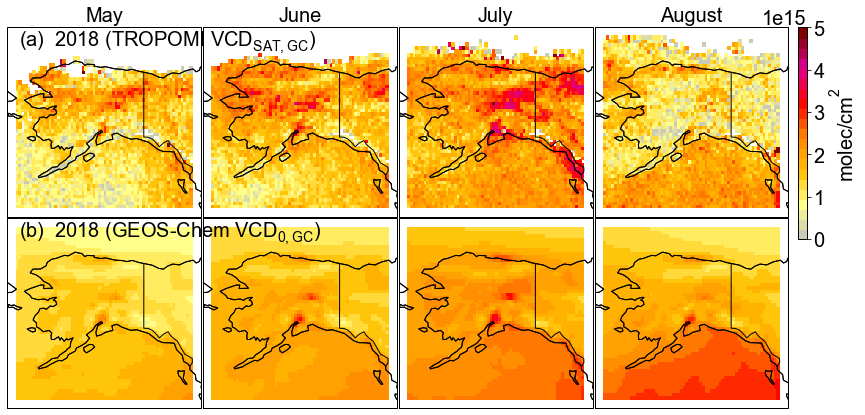

In [104]:
# TROPOMI 1

        
var = [
        # TROPOMI VCD
    HCHOVCD_TPM_18_new_noon ,\
       # GC background
    selnoon(HCHOVCD0_GC_18_NoWF ,hour1,hour2,2018),\
      ]

tmp_title = [
    
#     "2018 (GEOS-Chem VCD)",\
    "(a)  2018 (TROPOMI VCD$\mathregular{_{SAT,GC}}$)",\
    "(b)  2018 (GEOS-Chem VCD$\mathregular{_{0,GC}}$)",\

            ]
# vminmax = [[0e15,10e15],[0e15,10e15],[0e15,10e15],[-5e15,5e15]]
vminmax = [[-0e15,5e15],[-0e15,5e15],[-0e15,5e15],[-0e15,5e15]]
unitname= ["molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$"]
cmapname = [GHRSST_pos,GHRSST_pos,GHRSST_pos,  cmaps.NCV_jaisnd,  cmaps.NCV_jaisnd]
# cbposition = [0.91, 0.75, 0.008, 0.13]  # 3 panels
cbposition = [0.91, 0.46, 0.008, 0.42]   # 2 panels
proplot_mjja(var,tmp_title,vminmax,unitname,cmapname,cbposition)

plt.savefig('figs/Figure2.png',dpi=300,bbox_inches='tight')


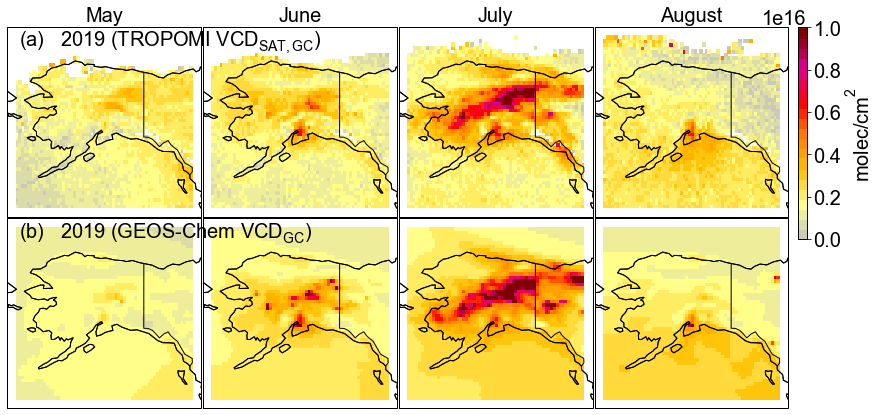

In [88]:
# TROPOMI 1

var = [
        # TROPOMI VCD    
    HCHOVCD_TPM_19_new ,\
       # GC VCD
       selnoon(HCHOVCD_GC_19_WF ,hour1,hour2,2019),\
        # GC bio dVCD
#        selnoon(HCHOVCD_GC_19_NoWF - HCHOVCD0_GC_19_NoWF ,hour1,hour2,2019),\
        # GC dVCD
#        selnoon(HCHOVCD_GC_19_WF_noon - HCHOVCD0_GC_19_NoWF ,hour1,hour2,2019),\
       
#        selnoon(HCHOVCD_GC_19_WF_noon - HCHOVCD0_GC_19_NoWF - (HCHOVCD_GC_19_WF-HCHOVCD_GC_19_NoWF) ,hour1,hour2,2019),\
      ]

tmp_title = [
    "(a)   2019 (TROPOMI VCD$\mathregular{_{SAT,GC}}$)",\
    "(b)   2019 (GEOS-Chem VCD$\mathregular{_{GC}}$)",\
#     "2019 (GEOS-Chem VCD$\mathregular{_{0,GC}}$)",\
            ]
vminmax = [[0e15,10e15],[0e15,10e15],[0e15,10e15],[-5e15,5e15]]
unitname= ["molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$"]
cmapname = [GHRSST_pos,GHRSST_pos,GHRSST_pos,  cmaps.NCV_jaisnd,  cmaps.NCV_jaisnd]
# cbposition = [0.91, 0.75, 0.008, 0.13]  # 3 panels
# cbposition = [0.91, 0.7, 0.008, 0.18]   # 2 panels
cbposition = [0.91, 0.46, 0.008, 0.42]   # 2 panels

# cbposition = "none"
proplot_mjja(var,tmp_title,vminmax,unitname,cmapname,cbposition)

plt.savefig('figs/Figure4.png',dpi=300,bbox_inches='tight')



In [89]:
# Wildfire Emission

Emis_BioBurn_18 = xr.open_dataset(jndirGC_WF+"Emis_BioBurn_18.nc", engine="netcdf4")
Emis_BioBurn_19 = xr.open_dataset(jndirGC_WF+"Emis_BioBurn_19.nc", engine="netcdf4")


In [90]:
def list_Emis_BioBurn(ds_Emis_BioBurn):
    tmp = ds_Emis_BioBurn
    
    list_Emis_BioBurn = [
        xr_shpmask( tmp["EmisCO_BioBurn"]* (1*12/28)*da_gridarea, shp_AK ).sum(dim='lat').sum(dim='lon') *24* 3600*1e3/1e9 ,\
        xr_shpmask( tmp["EmisCH2O_BioBurn"]* (1*12/30)*da_gridarea, shp_AK ).sum(dim='lat').sum(dim='lon') *24* 3600*1e3/1e9 ,\
    ]
    return list_Emis_BioBurn



def sum_Emis_BioBurn(ds_Emis_BioBurn):
    tmp = ds_Emis_BioBurn
        
    Emis_BioBurn =   [   tmp["EmisXYLE_BioBurn"]* (8*12/106.18) ,
                            tmp["EmisTOLU_BioBurn"]* (7*12/92.15)  ,
                            tmp["EmisPRPE_BioBurn"]* (3*12/42.09) ,
                            tmp["EmisMTPA_BioBurn"]* (10*12/136.26) ,
                            tmp["EmisMEK_BioBurn"]* (1*12/72.11) ,
                            tmp["EmisEOH_BioBurn"]* (2*12/46.08) ,
                            tmp["EmisCO_BioBurn"]* (1*12/28) ,
                            tmp["EmisCH4_BioBurn"]* (1*12/16) ,
                            tmp["EmisCH2O_BioBurn"]* (1*12/30) ,
                            tmp["EmisC3H8_BioBurn"]* (3*12/44) ,
                            tmp["EmisC2H6_BioBurn"]* (2*12/30) ,
                            tmp["EmisBENZ_BioBurn"]* (6*12/78) ,
                            tmp["EmisALK4_BioBurn"]* (4*12/58.12) ,
                            tmp["EmisALD2_BioBurn"]* (2*12/44.06) ,
                            tmp["EmisACET_BioBurn"]* (3*12/58.09)   ]
    
    sum_Emis_BioBurn = sum(Emis_BioBurn)
    sum_Emis_BioBurn = xr_shpmask( sum_Emis_BioBurn*da_gridarea, shp_AK ).sum(dim='lat').sum(dim='lon') *24* 3600*1e3/1e9
        
    return sum_Emis_BioBurn

In [91]:
# constrain BVOC emission amount in FA, TK and AK


# grid area matrix (unit: m)
import math
def getgridarea(lat_gc_AK,lon_gc_AK,resolution):
    [latres,lonres]=resolution
    coslat = np.array( list(map(lambda lat : math.cos(lat*math.pi/180), lat_gc_AK)) )
    gridarea0 = 111000*coslat*lonres * 111000*latres
    gridarea = np.tile(gridarea0[:,np.newaxis],[1,len(lon_gc_AK)])
    return gridarea
gridarea = getgridarea(lat_gc_AK,lon_gc_AK,[0.5,0.625])
da_gridarea = xr.DataArray(gridarea, coords=[lat_gc_AK, lon_gc_AK], dims=['lat','lon'])

sum_EmisMTPA_Total_18 = xr_shpmask(EmisMTPA_Total_18 * da_gridarea, shp_AK).sum(dim='lat').sum(dim='lon')
sum_EmisMTPA_Total_19 = xr_shpmask(EmisMTPA_Total_19 * da_gridarea, shp_AK).sum(dim='lat').sum(dim='lon')
sum_EmisISOP_Total_18 = xr_shpmask(EmisISOP_Total_18 * da_gridarea, shp_AK).sum(dim='lat').sum(dim='lon')
sum_EmisISOP_Total_19 = xr_shpmask(EmisISOP_Total_19 * da_gridarea, shp_AK).sum(dim='lat').sum(dim='lon')

# *3600*1e3/1e12     means    1 hour * 1000g * 1e-12 Tg
# * 24  means      daily = 24 hours
ratioC = (12*5)/(12*5+8)
print("MTPA Emis in AK 2018 summer is: "+str(  format( sum_EmisMTPA_Total_18.sum(dim='time').values *24 *3600*1e3/1e9*ratioC ,'.2f') ) +" GgC" )
print("MTPA Emis in AK 2019 summer is: "+str(  format( sum_EmisMTPA_Total_19.sum(dim='time').values *24 *3600*1e3/1e9*ratioC ,'.2f') ) +" GgC" )
print("ISOP Emis in AK 2018 summer is: "+str(  format( sum_EmisISOP_Total_18.sum(dim='time').values *24 *3600*1e3/1e9*ratioC ,'.2f') ) +" GgC" )
print("ISOP Emis in AK 2019 summer is: "+str(  format( sum_EmisISOP_Total_19.sum(dim='time').values *24 *3600*1e3/1e9*ratioC ,'.2f') ) +" GgC" )



MTPA Emis in AK 2018 summer is: 95.44 GgC
MTPA Emis in AK 2019 summer is: 118.93 GgC
ISOP Emis in AK 2018 summer is: 185.84 GgC
ISOP Emis in AK 2019 summer is: 270.35 GgC


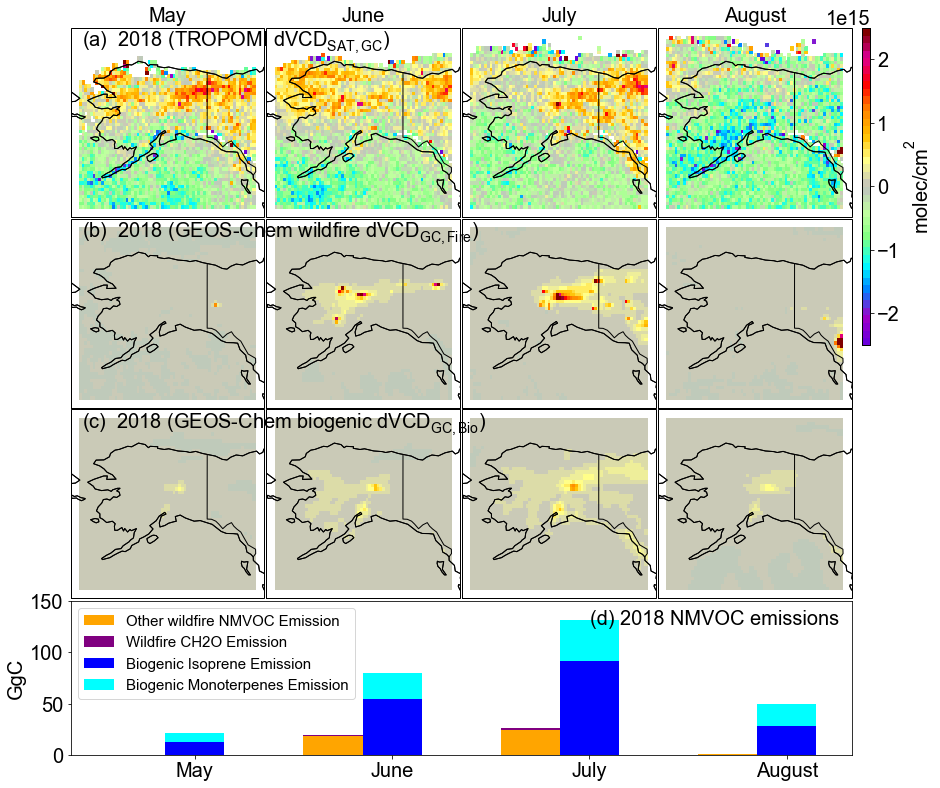

In [92]:
#####################################################################################################################
# Emission    +    fire vs Bio

mpl.rc('xtick', labelsize=20)
mpl.rc('ytick', labelsize=20)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

ratioC = (12*5)/(12*5+8)

        # TROPOMI dVCD
var = [selnoon(HCHOSCD_corr_TPM_18/AMF_GC_18_WF,  hour1,hour2,2018) ,\
        # GC wildfire dVCD
       selnoon(HCHOVCD_GC_18_WF - HCHOVCD_GC_18_NoWF ,hour1,hour2,2018),\
        # GC bio dVCD       
       selnoon(HCHOVCD_GC_18_NoWF - HCHOVCD0_GC_18_NoWF ,hour1,hour2,2018),\
      ]


tmp_title = ["(a)  2018 (TROPOMI dVCD$\mathregular{_{SAT,GC}}$)","(b)  2018 (GEOS-Chem wildfire dVCD$\mathregular{_{GC,Fire}}$)","(c)  2018 (GEOS-Chem biogenic dVCD$\mathregular{_{GC,Bio}}$)",\
             "", "",\
            ]

vminmax = [[-2.5e15,2.5e15],[-2.5e15,2.5e15],[-2.5e15,2.5e15]]
# vminmax = [[-5e15,5e15],[-5e15,5e15],[-5e15,5e15]]
unitname= ["molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molecules/cm^2"]
cmapname = [cmaps.GHRSST_anomaly,cmaps.GHRSST_anomaly,cmaps.GHRSST_anomaly,cmaps.GHRSST_anomaly,cmaps.GHRSST_anomaly,  cmaps.sunshine_9lev,  cmaps.NCV_jaisnd]
cbposition = [0.91, 0.46, 0.008, 0.42]   # 2 panels
proplot_mjja(var,tmp_title,vminmax,unitname,cmapname,cbposition)



##////////////////////////////////////////////##
##////////  Fire Emission Bar Plot ///////////##
##////////////////////////////////////////////##

subpanelposition = [0.125, -0.38, 0.775, 0.8]  # *0.07
ax2 = plt.axes(subpanelposition, aspect=0.0052)

x = [5,6,7,8]
width = 0.3
name_list = ["May","June","July","August"]

# residual
plt.bar(x, (  sum_Emis_BioBurn(Emis_BioBurn_18) - sum(list_Emis_BioBurn(Emis_BioBurn_18))  ).resample(time='1MS').sum(dim='time') , \
        width=width, label='Other wildfire NMVOC Emission',fc = 'orange' )

# CH2O
plt.bar(x, list_Emis_BioBurn(Emis_BioBurn_18)[1].resample(time='1MS').sum(dim='time'), \
#         width=width, label='Wildfire CH2O Emis',fc = 'purple' , bottom =list_Emis_BioBurn(Emis_BioBurn_18)[0] + sum_Emis_BioBurn(Emis_BioBurn_18) - sum(list_Emis_BioBurn(Emis_BioBurn_18)) )
        width=width, label='Wildfire CH2O Emission',fc = 'purple' , bottom = (  sum_Emis_BioBurn(Emis_BioBurn_18) - sum(list_Emis_BioBurn(Emis_BioBurn_18))  ).resample(time='1MS').sum(dim='time') )


for i in range(len(x)):
    x[i] = x[i] + width
    
plt.bar( x, (sum_EmisISOP_Total_18).resample(time="1MS").sum(dim='time').values *24 *3600*1e3/1e9*ratioC ,  width=width, label ='Biogenic Isoprene Emission',tick_label = name_list,fc = 'blue')
plt.bar( x, (sum_EmisMTPA_Total_18).resample(time="1MS").sum(dim='time').values *24 *3600*1e3/1e9*ratioC ,  width=width, label ='Biogenic Monoterpenes Emission',tick_label = name_list,fc = 'cyan', \
        bottom = (sum_EmisISOP_Total_18).resample(time="1MS").sum(dim='time').values *24 *3600*1e3/1e9*ratioC   )

plt.legend(fontsize=15, loc='upper left')
plt.ylabel("GgC",fontsize=20)
plt.ylim([0, 150])
plt.figtext(0.64,0.09,"(d) 2018 NMVOC emissions",fontsize=20)

plt.savefig('figs/Ems-dVCD_1.png',dpi=300,bbox_inches='tight')

In [93]:
fire_carbon_emis_18 = np.sum(
    (  sum_Emis_BioBurn(Emis_BioBurn_18) - sum(list_Emis_BioBurn(Emis_BioBurn_18))  ).resample(time='1MS').sum(dim='time') +\
    list_Emis_BioBurn(Emis_BioBurn_18)[1].resample(time='1MS').sum(dim='time')
)

bio_carbon_emis_18 = np.sum (
    (sum_EmisISOP_Total_18).resample(time="1MS").sum(dim='time').values*24*3600*1e3/1e9*ratioC +\
    (sum_EmisMTPA_Total_18).resample(time="1MS").sum(dim='time').values*24*3600*1e3/1e9*ratioC
)

print("fire_carbon_emis_18 = "+str(np.float(fire_carbon_emis_18.values))+ " GgC")
print("bio_carbon_emis_18 = "+str(bio_carbon_emis_18)+ " GgC")


fire_carbon_emis_18 = 46.508552625830426 GgC
bio_carbon_emis_18 = 281.2873795752229 GgC


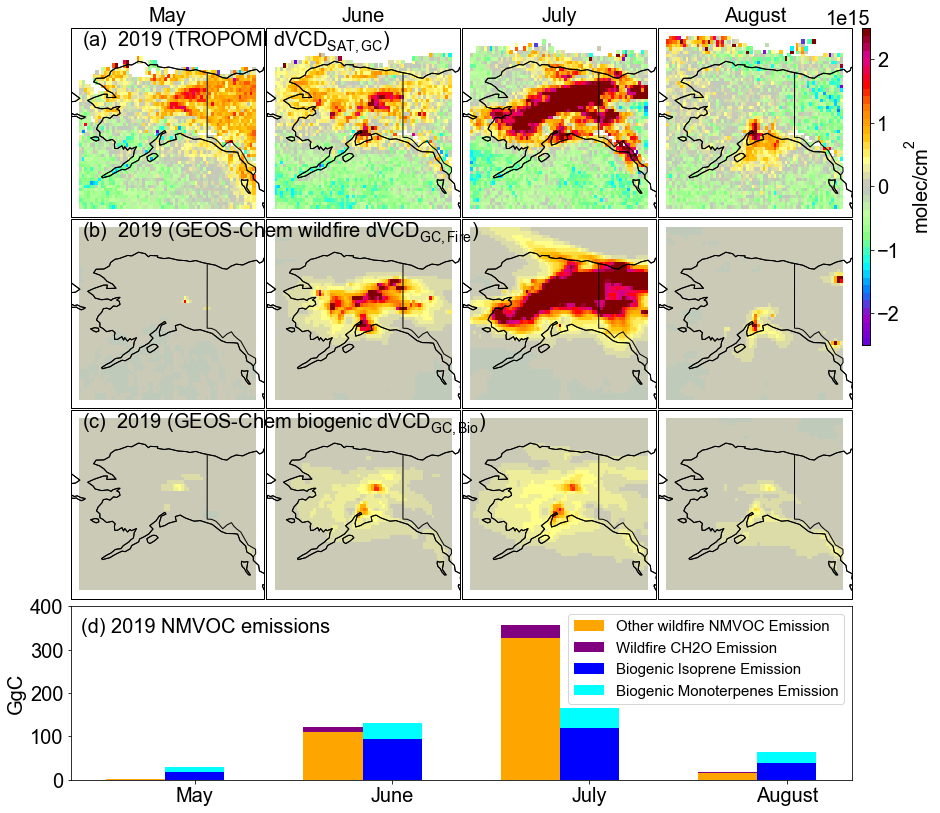

In [94]:
#####################################################################################################################
# Emission    +    fire vs Bio

mpl.rc('xtick', labelsize=20)
mpl.rc('ytick', labelsize=20)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

ratioC = (12*5)/(12*5+8)




        # TROPOMI dVCD
var = [selnoon( HCHOSCD_corr_TPM_19[1:]/AMF_GC_19_WF ,hour1,hour2,2019) ,\
        # GC wildfire dVCD
       selnoon(HCHOVCD_GC_19_WF - HCHOVCD_GC_19_NoWF ,hour1,hour2,2019),\
       # GC bio dVCD       
       selnoon(HCHOVCD_GC_19_NoWF - HCHOVCD0_GC_19_NoWF ,hour1,hour2,2019),\
      ]


tmp_title = ["(a)  2019 (TROPOMI dVCD$\mathregular{_{SAT,GC}}$)","(b)  2019 (GEOS-Chem wildfire dVCD$\mathregular{_{GC,Fire}}$)","(c)  2019 (GEOS-Chem biogenic dVCD$\mathregular{_{GC,Bio}}$)",\
             "", "",\
            ]

vminmax = [[-2.5e15,2.5e15],[-2.5e15,2.5e15],[-2.5e15,2.5e15]]
unitname= ["molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molecules/cm^2"]
cmapname = [cmaps.GHRSST_anomaly,cmaps.GHRSST_anomaly,cmaps.GHRSST_anomaly,cmaps.GHRSST_anomaly,cmaps.GHRSST_anomaly,  cmaps.sunshine_9lev,  cmaps.NCV_jaisnd]
cbposition = [0.91, 0.46, 0.008, 0.42]   # 2 panels
proplot_mjja(var,tmp_title,vminmax,unitname,cmapname,cbposition)



##////////////////////////////////////////////##
##////////  Fire Emission Bar Plot ///////////##
##////////////////////////////////////////////##

subpanelposition = [0.125, -0.40, 0.775, 0.8]  # *0.07
ax2 = plt.axes(subpanelposition, aspect=0.0022)

x = [5,6,7,8]
width = 0.3
name_list = ["May","June","July","August"]

# residual
plt.bar(x, (  sum_Emis_BioBurn(Emis_BioBurn_19) - sum(list_Emis_BioBurn(Emis_BioBurn_19))  ).resample(time='1MS').sum(dim='time') , \
        width=width, label='Other wildfire NMVOC Emission',fc = 'orange' )


# CH2O
plt.bar(x, list_Emis_BioBurn(Emis_BioBurn_19)[1].resample(time='1MS').sum(dim='time'), \
        width=width, label='Wildfire CH2O Emission',fc = 'purple' , bottom = (  sum_Emis_BioBurn(Emis_BioBurn_19) - sum(list_Emis_BioBurn(Emis_BioBurn_19))  ).resample(time='1MS').sum(dim='time') )


for i in range(len(x)):
    x[i] = x[i] + width
    
plt.bar( x, (sum_EmisISOP_Total_19).resample(time="1MS").sum(dim='time').values *24 *3600*1e3/1e9*ratioC ,  width=width, label ='Biogenic Isoprene Emission',tick_label = name_list,fc = 'blue')
plt.bar( x, (sum_EmisMTPA_Total_19).resample(time="1MS").sum(dim='time').values *24 *3600*1e3/1e9*ratioC ,  width=width, label ='Biogenic Monoterpenes Emission',tick_label = name_list,fc = 'cyan', \
        bottom = (sum_EmisISOP_Total_19).resample(time="1MS").sum(dim='time').values *24 *3600*1e3/1e9*ratioC   )

plt.figtext(0.135,0.08,"(d) 2019 NMVOC emissions",fontsize=20)

plt.legend(fontsize=15, loc='upper right')
plt.ylabel("GgC",fontsize=20)
plt.ylim([0, 400])


plt.savefig('figs/Ems-dVCD_2.png',dpi=300,bbox_inches='tight')

In [95]:
fire_carbon_emis_19 = np.sum(
    (  sum_Emis_BioBurn(Emis_BioBurn_19) - sum(list_Emis_BioBurn(Emis_BioBurn_19))  ).resample(time='1MS').sum(dim='time') +\
    list_Emis_BioBurn(Emis_BioBurn_19)[1].resample(time='1MS').sum(dim='time')
)

bio_carbon_emis_19 = np.sum (
    (sum_EmisISOP_Total_19).resample(time="1MS").sum(dim='time').values*24*3600*1e3/1e9*ratioC +\
    (sum_EmisMTPA_Total_19).resample(time="1MS").sum(dim='time').values*24*3600*1e3/1e9*ratioC
)


print("fire_carbon_emis_19 = "+str(np.float(fire_carbon_emis_19.values))+ " GgC")
print("bio_carbon_emis_19 = "+str(bio_carbon_emis_19)+ " GgC")


fire_carbon_emis_19 = 498.3140956229811 GgC
bio_carbon_emis_19 = 389.2762669220911 GgC


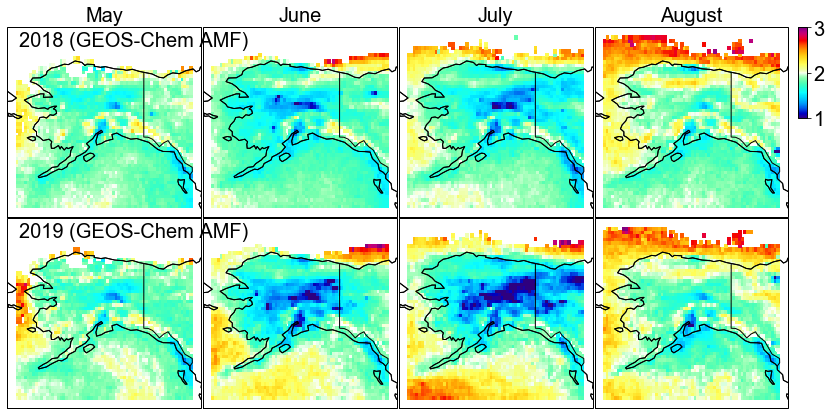

In [96]:
#####################################################################################################################
# AMF 1

        
var = [
        # GC AMF 2018
    AMF_GC_18_WF_noon ,\
        # GC AMF 2019
    AMF_GC_19_WF_noon , \
      ]

tmp_title = ["2018 (GEOS-Chem AMF)","2019 (GEOS-Chem AMF)",\
            ]
vminmax = [[1,3],[1,3],[-5e15,5e15],[-5e15,5e15]]
unitname= ["","","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$"]
cmapname = [cmaps.NCV_jaisnd,  cmaps.NCV_jaisnd,  cmaps.NCV_jaisnd, cmaps.sunshine_9lev,cmaps.sunshine_9lev]
cbposition = [0.91, 0.7, 0.008, 0.18]
proplot_mjja(var,tmp_title,vminmax,unitname,cmapname,cbposition)

plt.savefig('figs/AMF_1.png',dpi=300,bbox_inches='tight')

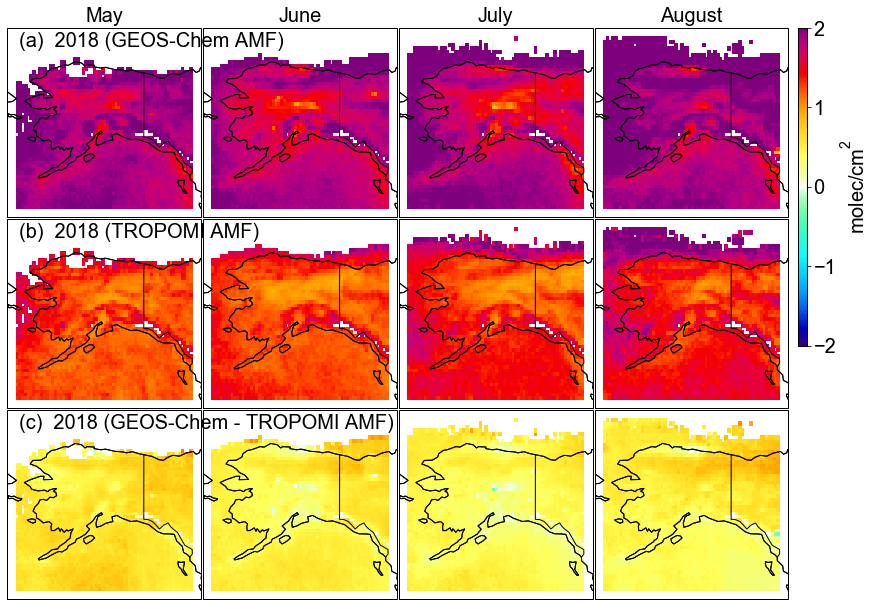

In [99]:
#####################################################################################################################
# AMF_GC vs AMF_SAT
        
var = [
        # AMF GC 2018
    AMF_GC_18_WF_noon,\
        # AMF SAT 2018
    AMF_HCHO_trop_TPM_18 , \
    
    AMF_GC_18_WF_noon - AMF_HCHO_trop_TPM_18

      ]

tmp_title = ["(a)  2018 (GEOS-Chem AMF)",\
             "(b)  2018 (TROPOMI AMF)",\
             "(c)  2018 (GEOS-Chem - TROPOMI AMF)"
            ]
vminmax = [[-2,2],[-2,2],[-2,2],[-2.5,2.5],[-2.5,2.5],[0,3],[0,3]]
unitname= ["","","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$"]
cmapname = [cmaps.NCV_jaisnd,cmaps.NCV_jaisnd,cmaps.NCV_jaisnd,  cmaps.NCV_jaisnd,  cmaps.sunshine_9lev]
# cbposition = [0.91, 0.7, 0.008, 0.18]    # 3 panels
cbposition = [0.91, 0.46, 0.008, 0.42]   # 2 panels
proplot_mjja(var,tmp_title,vminmax,unitname,cmapname,cbposition)

plt.savefig('figs/AMF_18.png',dpi=300,bbox_inches='tight')

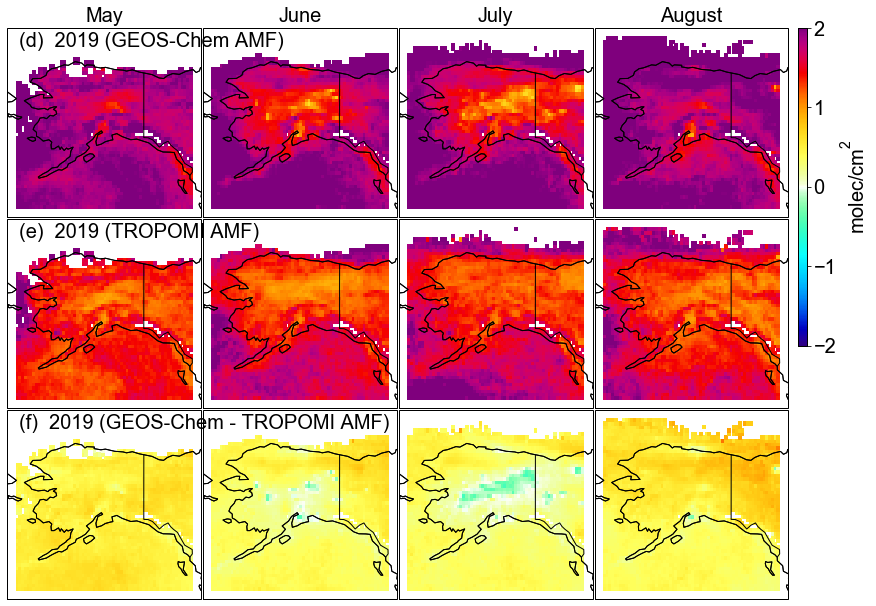

In [103]:
#####################################################################################################################
# AMF_GC vs AMF_SAT
        
var = [
        # AMF GC 2019
    AMF_GC_19_WF_noon ,\
        # AMF SAT 2019
    AMF_HCHO_trop_TPM_19[1:] , \
    
    AMF_GC_19_WF_noon - AMF_HCHO_trop_TPM_19

      ]

tmp_title = ["(d)  2019 (GEOS-Chem AMF)",\
             "(e)  2019 (TROPOMI AMF)",\
             "(f)  2019 (GEOS-Chem - TROPOMI AMF)"
            ]

vminmax = [[-2,2],[-2,2],[-2,2],[-2.5,2.5],[-2.5,2.5],[0,3],[0,3]]
# vminmax = [[-2.5,2.5],[-2.5,2.5],[-2.5,2.5],[-2,2],[-2,2]]
unitname= ["","","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$"]
cmapname = [cmaps.NCV_jaisnd,cmaps.NCV_jaisnd,cmaps.NCV_jaisnd,  cmaps.NCV_jaisnd,  cmaps.sunshine_9lev]
# cbposition = [0.91, 0.7, 0.008, 0.18]    # 3 panels
cbposition = [0.91, 0.46, 0.008, 0.42]   # 2 panels
proplot_mjja(var,tmp_title,vminmax,unitname,cmapname,cbposition)

plt.savefig('figs/AMF_19.png',dpi=300,bbox_inches='tight')

In [ ]:
var = [
    selnoon(HCHOVCD0_GC_19_NoWF, hour1, hour2, 2019),\
    selnoon(HCHOVCD0_TPM_19[1:], hour1, hour2, 2019),\
    selnoon(HCHOVCD0_GC_19_NoWF, hour1, hour2, 2019) - selnoon(HCHOVCD0_TPM_19[1:], hour1, hour2, 2019),\
      ]

tmp_title = [
    "(a)  2019 (GEOS-Chem Background)",\
    "(b)  2019 (TROPOMI Background)",\
    "(c)  2019 (GEOS-Chem - TROPOMI Background)",\
            ]
vminmax = [[0e15,5e15],[0e15,5e15],[-5e15,5e15]]
unitname= ["molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molecules/cm^2"]
cmapname = [GHRSST_pos,GHRSST_pos,cmaps.GHRSST_anomaly,  cmaps.sunshine_9lev,  cmaps.NCV_jaisnd]
# cbposition = [0.91, 0.7, 0.008, 0.18]
cbposition = [0.91, 0.46, 0.008, 0.42]   # 2 panels

proplot_mjja(var,tmp_title,vminmax,unitname,cmapname,cbposition)

plt.savefig('figs/Background_GCvsTPM_19.png',dpi=300,bbox_inches='tight')

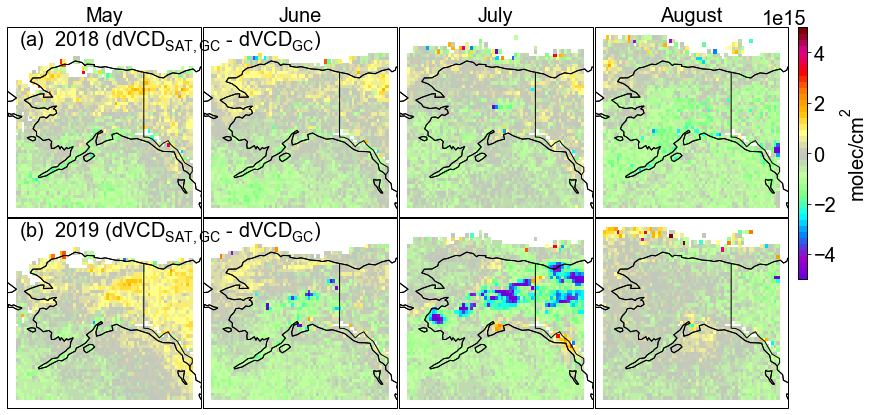

In [101]:
#####################################################################################################################
# VCD_SAT,GC - VCD_GC

        
var = [
    
    HCHOVCD_TPM_18_new_noon - HCHOVCD_GC_18_WF_noon,\
    HCHOVCD_TPM_19_new_noon - HCHOVCD_GC_19_WF_noon

      ]

tmp_title = [
    "(a)  2018 (dVCD$\mathregular{_{SAT,GC}}$ - dVCD$\mathregular{_{GC}}$)",\
    "(b)  2019 (dVCD$\mathregular{_{SAT,GC}}$ - dVCD$\mathregular{_{GC}}$)",\

            ]

vminmax = [[-5e15,5e15],[-5e15,5e15]]
unitname= ["molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molecules/cm^2"]
cmapname = [cmaps.GHRSST_anomaly, cmaps.GHRSST_anomaly, cmaps.sunshine_9lev,  cmaps.NCV_jaisnd,GHRSST_pos,GHRSST_pos]
# cbposition = [0.91, 0.7, 0.008, 0.18]
cbposition = [0.91, 0.38, 0.008, 0.5]   # 2 panels

proplot_mjja(var,tmp_title,vminmax,unitname,cmapname,cbposition)

plt.savefig('figs/dVCD_difference.png',dpi=300,bbox_inches='tight')

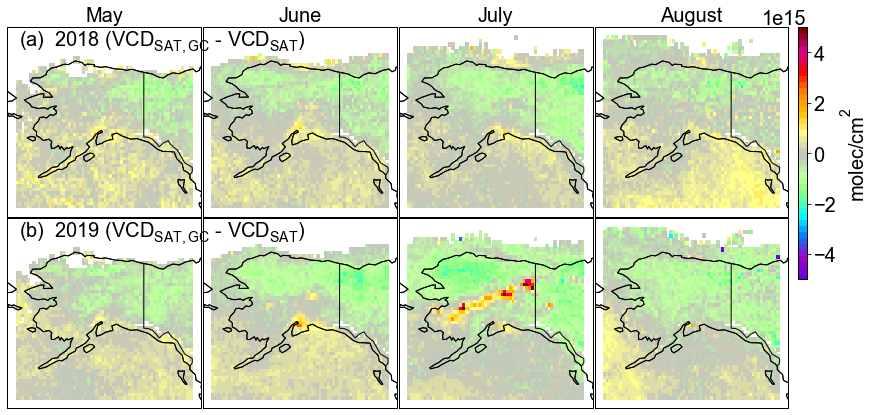

In [102]:
#####################################################################################################################
# VCD_SAT,GC - VCD_SAT

        
var = [
    
    HCHOVCD_TPM_18_new_noon - selnoon(HCHOVCD_TPM_18,hour1,hour2,2018),\
    HCHOVCD_TPM_19_new_noon - selnoon(HCHOVCD_TPM_19,hour1,hour2,2019),\

      ]

tmp_title = [
    "(a)  2018 (VCD$\mathregular{_{SAT,GC}}$ - VCD$\mathregular{_{SAT}}$)",\
    "(b)  2019 (VCD$\mathregular{_{SAT,GC}}$ - VCD$\mathregular{_{SAT}}$)",\

            ]

vminmax = [[-5e15,5e15],[-5e15,5e15]]
unitname= ["molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molec/$\mathregular{cm^2}$","molecules/cm^2"]
cmapname = [cmaps.GHRSST_anomaly, cmaps.GHRSST_anomaly, cmaps.sunshine_9lev,  cmaps.NCV_jaisnd,GHRSST_pos,GHRSST_pos]
cbposition = [0.91, 0.38, 0.008, 0.5]   # 2 panels

proplot_mjja(var,tmp_title,vminmax,unitname,cmapname,cbposition)

plt.savefig('figs/TPM_VCD_difference.png',dpi=300,bbox_inches='tight')